In [1]:
# Importando o Pandas

import pandas as pd
pd.set_option('future.no_silent_downcasting', True) #Definindo comportamento do Pandas

In [2]:
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/decision-tree/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
# Substituindo a variável categórica por numérica
arquivo['color'] = arquivo['color'].replace('red', 0)
arquivo['color'] = arquivo['color'].replace('white', 1)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [4]:
# Definindo o limiar para corte de vinhos bons como os de qualidade >=7
import numpy as np
arquivo['worst'] = np.where(arquivo['quality'] < 7, 1, 0)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1


In [5]:
#arquivo = arquivo.drop(['alcohol', free sulfur dioxide', total sulfur dioxide'], axis=1) # Teste removendo várias colunas com baixa correlação

arquivo = arquivo.drop(['quality'], axis=1) #Removendo a coluna 'quality' para não interferir nos cálculos do modelo para predição da variável dependente 'worst'

arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [6]:
# Exibir o percentual de cada classe
print(arquivo['worst'].value_counts(normalize=True) * 100)

worst
1    80.344775
0    19.655225
Name: proportion, dtype: float64


In [7]:
# Definindo os atributos da função de aprendizagem
y = arquivo['worst']
X = arquivo.drop('worst',axis = 1)

In [8]:
from sklearn.model_selection import train_test_split

# Definindo os conjuntos de treino e teste, onde x é o conjunto de atributos (features que são nossas variáveis preditoras) e y é a variável alvo.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=55)

In [9]:
#ExtraTreesClassifier
#(n_estimators=40, max_depth=20, min_samples_leaf=1, min_samples_split=2, max_features="sqrt", class_weight="balanced", random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Configuração dos Hiperparâmetros para o Modelo RandomForest
modelo = RandomForestClassifier(
    n_estimators=40,          # Número de árvores na floresta
    max_depth=20,              # Profundidade máxima de cada árvore
    min_samples_leaf=1,        # Número mínimo de amostras necessárias em um nó folha
    min_samples_split=2,       # Número mínimo de amostras necessárias para dividir um nó interno
    max_features="sqrt",       # Número de características a considerar quando procurar a melhor divisão
    # class_weight="balanced",   # Pesar as classes de forma balanceada
    class_weight = {0: 0.8, 1: 0.2},  # Esses pesos são apenas um exemplo e devem ser ajustados conforme necessário
    random_state=42            # Semente para a geração de números aleatórios
)

#Treinamento e Predição
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

In [10]:
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.8825174825174825


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[ 163  130]
 [  38 1099]]


In [12]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred, zero_division=0))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.81      0.56      0.66       293
           1       0.89      0.97      0.93      1137

    accuracy                           0.88      1430
   macro avg       0.85      0.76      0.79      1430
weighted avg       0.88      0.88      0.87      1430



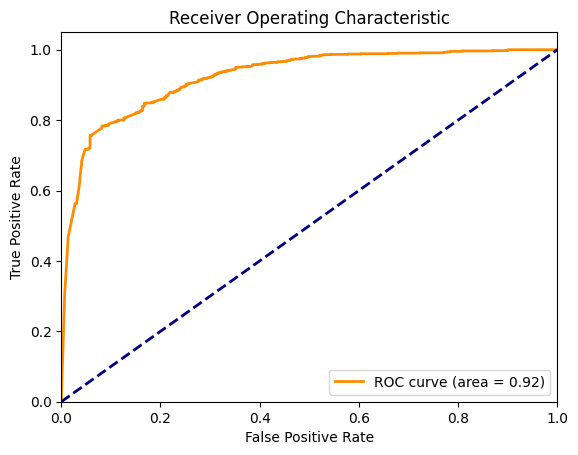

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
